<a href="https://colab.research.google.com/github/saif-islam-rayhan/Deep-Learning-Project/blob/main/C2_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# CNN = Convolutional Neural Network

In [4]:
# pretrain model = Model Train Huge Data

# Task-> Directly Use (Inference)
# Task -> Dataset (Custom Dataset) -> Model (Finetune)-> (Inference)

# pretrain = Huge Data , Gpu , High (Generalized dataset)-> Model

# 70 = Pretrain
# 30 = custom Dataset + Pretrain Model

# 📚 Image Recognition and Generation

This notebook showcases **real-world applications** of Convolutional Neural Networks (CNNs), focusing on:

- 🔍 Object Detection using **YOLO + Supervision**
- 🔢 Object Counting (e.g., vehicles)
- 🔥 Heatmap Generation for density analysis
- 📖 Optical Character Recognition (OCR)


CNNs are powerful because they not only classify images but also understand **where** objects are and **how many** exist. These use cases appear in:

- Self-driving cars (object detection, lane detection)
- Retail analytics (customer heatmaps)
- Surveillance (person/vehicle counting)
- Document reading (OCR)


# Requirements:
Install required libraries:


In [1]:
!pip install supervision ultralytics roboflow pytesseract rfdetr inference

# SECTION 1: Object Detection with YOLO

In [2]:
## LOAD OBJECT DETECTION MODEL

import supervision as sv
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load YOLOv8 model
model = YOLO("yolo11x.pt") # Weight (Pretrained)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Model usuage :
# Environment (Deploy): gpu vram
# Fast detection -> Small s
# Accuract (Medical)-> X

In [4]:
# Load image
image_path = "/content/images1.jpeg"
image = cv2.imread(image_path)


# Run inference
results = model(image)[0]

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.12/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.12/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 112.4ms
image 2/2 /usr/local/lib/python3.12/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 3 ties, 66.4ms
Speed: 3.7ms preprocess, 89.4ms inference, 160.5ms postprocess per image at shape (1, 3, 384, 640)


In [5]:
# # Load image
# image_path = "/content/images.jpg"
# image = cv2.imread(image_path)


# # Run inference
# results = model(image)[0]

# print(results)

# Annotate
box_annotator = sv.BoxAnnotator()
detections = sv.Detections.from_ultralytics(results)
annotated_image = box_annotator.annotate(scene=image.copy(), detections=detections)

# Show
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title("YOLO Object Detection")
plt.axis(False)
plt.show()

AttributeError: 'NoneType' object has no attribute 'copy'

In [6]:
# Pretrain Model -> Task

# Dataset (Person Class , Car Class , Dog , Cat ......) ->64/65 Class

# Finetune :
# 1. Class not present in  pretrain model
# 2. class present but accuracy to detect the class is very low
# 3. Dataset on the class

In [ ]:
detections

In [ ]:
# Load image
image_path = "/content/lede-674f21759884d.jpg"
image = cv2.imread(image_path)

# Run inference
results = model(image)[0]

# Annotate
box_annotator = sv.BoxAnnotator()
detections = sv.Detections.from_ultralytics(results)
annotated_image = box_annotator.annotate(scene=image.copy(), detections=detections)

# Show
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title("YOLO Object Detection")
plt.axis(False)
plt.show()

In [ ]:
# Model -> Cabality

In [ ]:
print(detections)

In [ ]:
# object Person =.49 , Car =.20  Cat= ..
# Confidence =0.5

ModelDependencyMissing: Your `inference` configuration does not support Qwen2.5-VL model. Use pip install 'inference[transformers]' to install missing requirements.To suppress this warning, set QWEN_2_5_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM2 model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM2_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support CLIP model. Use pip install 'inference[clip]' to install missing requirements.To suppress this warning, set CORE_MODEL_CLIP_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support Gaze Detection model. Use pip install 'inference[gaze]' to install mi

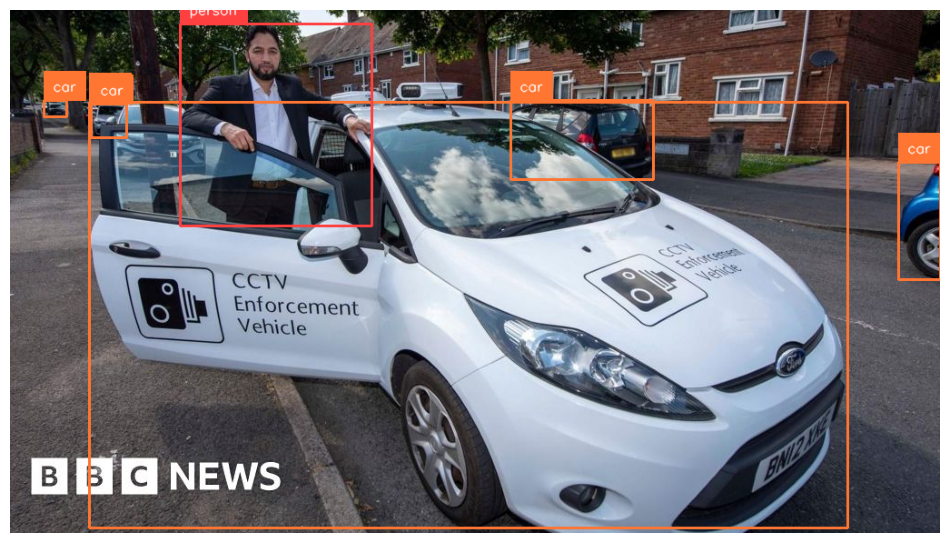

In [7]:
import os ,io
import supervision as sv
from inference import get_model
from PIL import Image
from io import BytesIO
import requests

url = "https://ichef.bbci.co.uk/news/1024/branded_news/eec8/live/9e228280-50e5-11f0-922f-9fb4bdd79d98.jpg"
image = Image.open(io.BytesIO(requests.get(url).content))

model = get_model("rfdetr-base")

predictions = model.infer(image, confidence=0.5)[0]

detections = sv.Detections.from_inference(predictions)

labels = [prediction.class_name for prediction in predictions.predictions]

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections, labels)

sv.plot_image(annotated_image)

annotated_image.save("annotated_image_base.jpg")

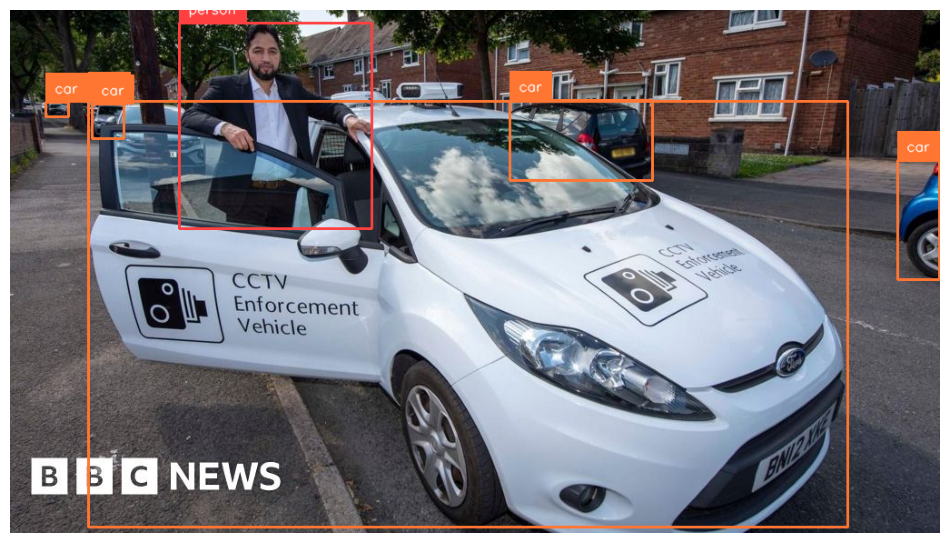

In [8]:

model = get_model("rfdetr-large")

predictions = model.infer(image, confidence=0.5)[0]

detections = sv.Detections.from_inference(predictions)

labels = [prediction.class_name for prediction in predictions.predictions]

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections, labels)

sv.plot_image(annotated_image)

## VIDEO OBJECT DETECTION


In [9]:
import supervision as sv
from rfdetr import RFDETRBase
from rfdetr.util.coco_classes import COCO_CLASSES
import cv2 # Import cv2

model = RFDETRBase()

def callback(frame, index):
    # Convert 4-channel frame to 3-channel if necessary
    if frame.shape[-1] == 4:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGRA2BGR)

    # Add .copy() after slicing to ensure a contiguous array with positive strides
    detections = model.predict(frame[:, :, ::-1].copy(), threshold=0.5)

    labels = [
        f"{COCO_CLASSES[class_id]} {confidence:.2f}"
        for class_id, confidence
        in zip(detections.class_id, detections.confidence)
    ]

    annotated_frame = frame.copy()
    annotated_frame = sv.BoxAnnotator().annotate(annotated_frame, detections)
    annotated_frame = sv.LabelAnnotator().annotate(annotated_frame, detections, labels)
    return annotated_frame

sv.process_video(
    source_path= "https://media.roboflow.com/supervision/video-examples/vehicles.mp4",
    target_path="/content/annotated_video.mp4",
    callback=callback
)

rf-detr-base.pth: 100%|██████████| 355M/355M [00:04<00:00, 91.1MiB/s]


Loading pretrain weights


# SECTION 2: Object Counting

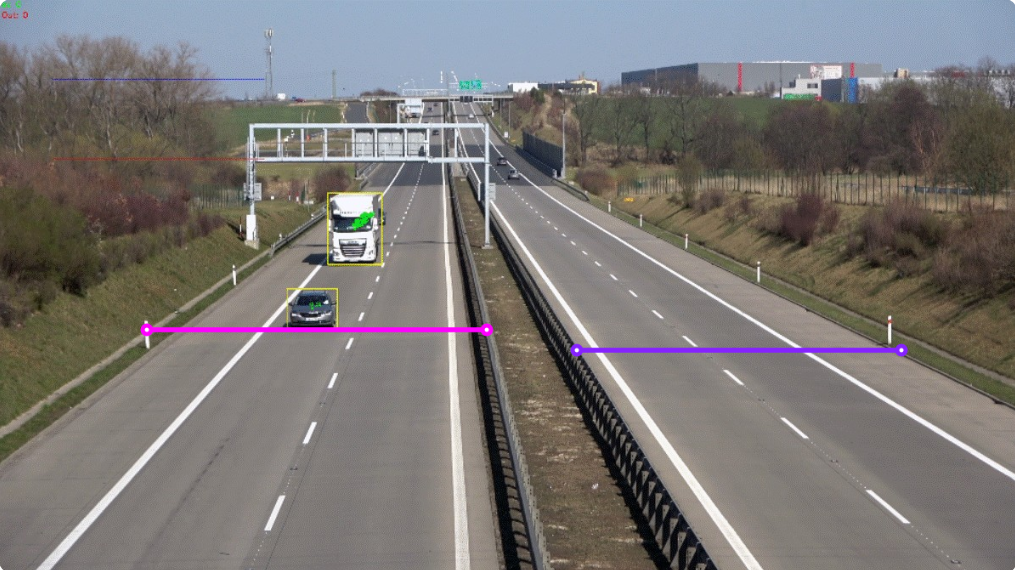

## ZONE ANALYTICS
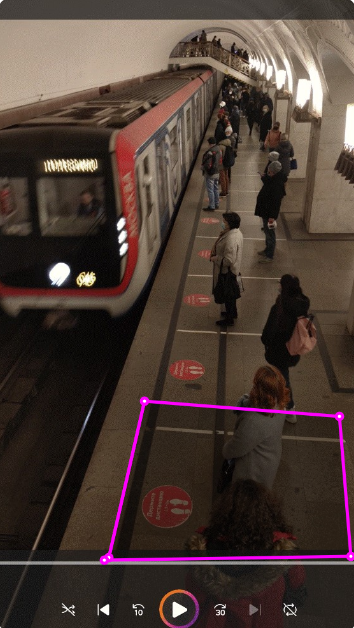

# SECTION 3: Heatmap Generation

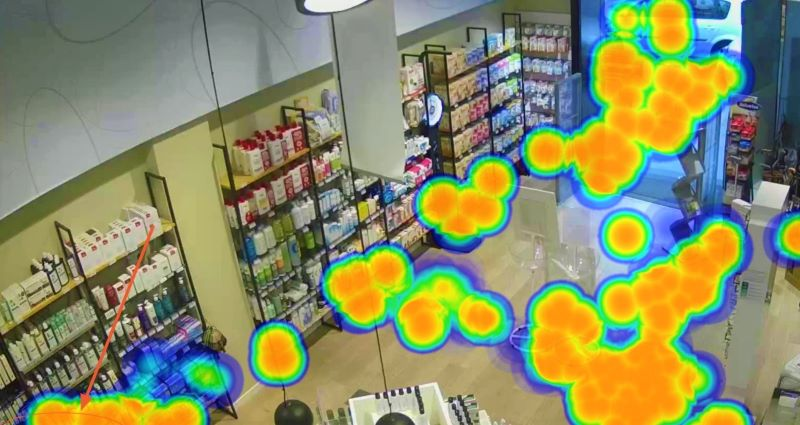

# SECTION 4: OCR (Text Extraction)

In [10]:
import pytesseract
from PIL import Image
import cv2
import matplotlib.pyplot as plt

ocr_image = cv2.imread("/content/testocr.png")
ocr_image_rgb = cv2.cvtColor(ocr_image, cv2.COLOR_BGR2RGB)

# OCR
ocr_text = pytesseract.image_to_string(ocr_image_rgb)
print("Detected Text:")
print(ocr_text)

plt.imshow(ocr_image_rgb)
plt.title("OCR Image")
plt.axis(False)
plt.show()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [11]:
!git clone https://github.com/TAHMID37/Computer-Vision

Cloning into 'Computer-Vision'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 20 (delta 1), reused 15 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 6.95 MiB | 13.92 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [12]:
%cd /content/Computer-Vision

/content/Computer-Vision


In [13]:
!pip install -r requirements.txt


## Object Counting

In [14]:
import cv2
import numpy as np
from ultralytics import YOLO
import sys
from IPython.display import Video

# Settings
SLOWDOWN_MS = 50  # not needed for Colab but kept for consistency
VIDEO_PATH = 'https://media.roboflow.com/supervision/video-examples/vehicles.mp4'   # Upload your video
MODEL_PATH = 'yolo11x.pt'     # YOLO model

# Annotation coordinates (based on 1198x675 reference frame)
ANNOT_LINE_IN_START = (174, 389)
ANNOT_LINE_IN_END = (574, 389)
ANNOT_LINE_OUT_START = (680, 413)
ANNOT_LINE_OUT_END = (1062, 413)
ANNOT_W, ANNOT_H = 1198, 675


# Vehicle classes in COCO dataset: car, motorcycle, bus, truck
VEHICLE_CLASS_IDS = [2, 3, 5, 7]


In [15]:
def process_video(video_path=VIDEO_PATH, output_path="output.mp4"):
    try:
        model = YOLO(MODEL_PATH)
    except Exception as e:
        print(f"\n[ERROR] Failed to load YOLO model from '{MODEL_PATH}'.")
        print("Error details:", e)
        sys.exit(1)

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Failed to open video file.")
        return

    # Read first frame to get size
    ret, frame = cap.read()
    if not ret:
        print("Failed to read first frame.")
        return
    orig_h, orig_w = frame.shape[:2]

    # Scale annotation coordinates
    def scale_point(pt):
        x, y = pt
        return (int(x * orig_w / ANNOT_W), int(y * orig_h / ANNOT_H))

    LINE_IN_START = scale_point(ANNOT_LINE_IN_START)
    LINE_IN_END = scale_point(ANNOT_LINE_IN_END)
    LINE_OUT_START = scale_point(ANNOT_LINE_OUT_START)
    LINE_OUT_END = scale_point(ANNOT_LINE_OUT_END)

    # Prepare output writer
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out = cv2.VideoWriter(output_path, fourcc, 20, (960, 540))

    # Reset video to start
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

    in_count, out_count = 0, 0
    already_counted_in, already_counted_out = set(), set()
    track_history = {}

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        results = model.track(frame, persist=True, tracker="botsort.yaml", verbose=False)[0]
        boxes = results.boxes
        if boxes is None or boxes.xyxy is None:
            display_frame = cv2.resize(frame, (960, 540))
            out.write(display_frame)
            continue

        class_ids = boxes.cls.cpu().numpy().astype(int)
        xyxy = boxes.xyxy.cpu().numpy()
        track_ids = boxes.id.cpu().numpy().astype(int) if boxes.id is not None else [None]*len(xyxy)
        vehicle_indices = [i for i, cid in enumerate(class_ids) if cid in VEHICLE_CLASS_IDS]

        # Draw lines
        cv2.line(frame, LINE_IN_START, LINE_IN_END, (255, 0, 0), 2)
        cv2.line(frame, LINE_OUT_START, LINE_OUT_END, (0, 0, 255), 2)

        for idx in vehicle_indices:
            x1, y1, x2, y2 = map(int, xyxy[idx])
            track_id = track_ids[idx]
            center = ((x1 + x2) // 2, (y1 + y2) // 2)

            if track_id not in track_history:
                track_history[track_id] = []
            track_history[track_id].append(center)
            if len(track_history[track_id]) > 2:
                track_history[track_id] = track_history[track_id][-2:]

            if len(track_history[track_id]) == 2:
                prev_center, curr_center = track_history[track_id]

                # Line IN
                if (LINE_IN_START[0] <= prev_center[0] <= LINE_IN_END[0] and
                    LINE_IN_START[0] <= curr_center[0] <= LINE_IN_END[0]):
                    if prev_center[1] < LINE_IN_START[1] <= curr_center[1] and track_id not in already_counted_in:
                        in_count += 1
                        already_counted_in.add(track_id)

                # Line OUT
                if (LINE_OUT_START[0] <= prev_center[0] <= LINE_OUT_END[0] and
                    LINE_OUT_START[0] <= curr_center[0] <= LINE_OUT_END[0]):
                    if prev_center[1] > LINE_OUT_START[1] >= curr_center[1] and track_id not in already_counted_out:
                        out_count += 1
                        already_counted_out.add(track_id)

            # Draw bbox + ID
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 255), 2)
            cv2.circle(frame, center, 5, (0, 255, 0), -1)
            cv2.putText(frame, f'ID {track_id}', (center[0] - 10, center[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

        # Counts
        cv2.putText(frame, f'In: {in_count}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 2.2, (0,255,0), 5)
        cv2.putText(frame, f'Out: {out_count}', (10, 120), cv2.FONT_HERSHEY_SIMPLEX, 2.2, (0,0,255), 5)

        display_frame = cv2.resize(frame, (960, 540))
        out.write(display_frame)

    cap.release()
    out.release()
    print(f"✅ Processing complete. Saved to {output_path}")


In [16]:
process_video(VIDEO_PATH, "output.mp4")


requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 1.1s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect

✅ Processing complete. Saved to output.mp4


## Zone Analytics

In [17]:
import cv2
import numpy as np
from ultralytics import YOLO
from IPython.display import Video

# Paths
VIDEO_PATH = "https://media.roboflow.com/supervision/video-examples/subway.mp4"   # Upload your video as subway.mp4
MODEL_PATH = "yolo11x.pt"   # YOLOv8 model

# Polygon annotation (based on 562x997 reference image)
ANNOT_POLYGON = np.array([[174, 880], [230, 634], [536, 658], [554, 878], [167, 884]])
ANNOT_W, ANNOT_H = 562, 997


In [18]:
def scale_point(pt, orig_w, orig_h):
    x, y = pt
    return (int(x * orig_w / ANNOT_W), int(y * orig_h / ANNOT_H))

def process_zone(video_path=VIDEO_PATH, output_path="zone_output.mp4"):
    model = YOLO(MODEL_PATH)
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("❌ Failed to open video file.")
        return

    # Get first frame size
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to read first frame.")
        return
    orig_h, orig_w = frame.shape[:2]

    # Scale polygon
    scaled_polygon = np.array([scale_point(pt, orig_w, orig_h) for pt in ANNOT_POLYGON])

    # Reset to first frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

    # Prepare output writer
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out = cv2.VideoWriter(output_path, fourcc, 20, (562, 997))

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Draw polygon
        cv2.polylines(frame, [scaled_polygon], isClosed=True, color=(255, 0, 255), thickness=3)

        # Detect people
        results = model(frame)[0]
        boxes = results.boxes
        count_in_zone = 0
        if boxes is not None and boxes.xyxy is not None:
            class_ids = boxes.cls.cpu().numpy().astype(int)
            xyxy = boxes.xyxy.cpu().numpy()
            person_indices = [i for i, cid in enumerate(class_ids) if cid == 0]  # class 0 = person

            for i in person_indices:
                x1, y1, x2, y2 = map(int, xyxy[i])
                center = ((x1 + x2) // 2, (y1 + y2) // 2)
                # Check if inside polygon
                if cv2.pointPolygonTest(scaled_polygon, center, False) >= 0:
                    count_in_zone += 1
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.circle(frame, center, 5, (0, 255, 0), -1)
                else:
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
                    cv2.circle(frame, center, 5, (0, 0, 255), -1)

        # Show count
        cv2.putText(frame, f"People in zone: {count_in_zone}", (30, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 255), 5)

        # Resize for annotation size
        display_frame = cv2.resize(frame, (562, 997))
        out.write(display_frame)

    cap.release()
    out.release()
    print(f"✅ Processing complete. Saved to {output_path}")


In [19]:
process_zone(VIDEO_PATH, "zone_output.mp4")



0: 640x384 10 persons, 1 backpack, 2 handbags, 66.8ms
Speed: 2.8ms preprocess, 66.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 1 backpack, 3 handbags, 35.9ms
Speed: 3.6ms preprocess, 35.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 1 backpack, 2 handbags, 34.9ms
Speed: 3.5ms preprocess, 34.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 1 backpack, 2 handbags, 34.4ms
Speed: 3.6ms preprocess, 34.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 1 backpack, 2 handbags, 33.7ms
Speed: 3.8ms preprocess, 33.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 1 backpack, 2 handbags, 33.8ms
Speed: 5.2ms preprocess, 33.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 1 backpack, 3 handbags, 33.2ms
Speed: 3.6ms preprocess, 33.2ms i

## HEATMAP

In [20]:
def process_heatmap(video_path=VIDEO_PATH, output_path="heatmap_output.mp4"):
    model = YOLO(MODEL_PATH)
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("❌ Failed to open video file.")
        return

    # Get frame size
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to read first frame.")
        return
    orig_h, orig_w = frame.shape[:2]

    # Heatmap annotator
    heatmap_annotator = sv.HeatMapAnnotator(
        opacity=0.6,
        radius=40,
        kernel_size=25,
        top_hue=0,      # red
        low_hue=120     # blue
    )

    # Prepare video writer (same as annotation size: 562x997)
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*"mp4v"), 20, (562, 997))

    # Reset to start
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Detect people
        result = model(frame)[0]
        detections = sv.Detections.from_ultralytics(result)
        mask = detections.class_id == 0  # person only
        detections.xyxy = detections.xyxy[mask]
        detections.confidence = detections.confidence[mask]
        detections.class_id = detections.class_id[mask]

        # Annotate with heatmap
        frame_with_heatmap = heatmap_annotator.annotate(scene=frame.copy(), detections=detections)

        # Resize for annotation size
        display_frame = cv2.resize(frame_with_heatmap, (562, 997))
        out.write(display_frame)

        frame_count += 1
        if frame_count % 50 == 0:
            print(f"Processed {frame_count} frames...")

    cap.release()
    out.release()
    print(f"✅ Heatmap video saved to {output_path}")


In [21]:
process_heatmap(VIDEO_PATH, "heatmap_output.mp4")



0: 640x384 10 persons, 1 backpack, 3 handbags, 62.8ms
Speed: 2.7ms preprocess, 62.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 1 backpack, 3 handbags, 39.5ms
Speed: 3.4ms preprocess, 39.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 1 backpack, 3 handbags, 39.5ms
Speed: 6.1ms preprocess, 39.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 1 backpack, 3 handbags, 39.5ms
Speed: 3.5ms preprocess, 39.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 1 backpack, 2 handbags, 39.5ms
Speed: 3.4ms preprocess, 39.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 1 backpack, 3 handbags, 39.5ms
Speed: 3.4ms preprocess, 39.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 persons, 1 backpack, 3 handbags, 39.5ms
Speed: 4.3ms preprocess, 39.5ms i

Customer Sentenment (Facial

## Image segmentation

First : object detect

In [23]:
# Load image
image_path = "/content/360_F_266724172_Iy8gdKgMa7XmrhYYxLCxyhx6J7070Pr8.jpg"
image = cv2.imread(image_path)
# Load YOLOv8 model
model = YOLO("yolo11x.pt")

# Run inference
results = model(image)[0]

# print(results)

# Annotate
box_annotator = sv.BoxAnnotator()
detections = sv.Detections.from_ultralytics(results)
annotated_image = box_annotator.annotate(scene=image.copy(), detections=detections)

# Show
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title("YOLO Object Detection")
plt.axis(False)
plt.show()

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.12/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.12/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 71.0ms
image 2/2 /usr/local/lib/python3.12/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 3 ties, 43.6ms
Speed: 1.9ms preprocess, 57.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


AttributeError: 'NoneType' object has no attribute 'copy'

In [ ]:
print(detections)

In [24]:
from ultralytics import SAM
import cv2
import matplotlib.pyplot as plt

# Load a model
model = SAM("sam2.1_b.pt")

# Load the image (assuming it's the same image used in the previous cell)
image_path = "/content/360_F_266724172_Iy8gdKgMa7XmrhYYxLCxyhx6J7070Pr8.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Get the bounding box from the previous detection result
# Assuming the detections variable from cell k_VnoUEHPifp is available
if 'detections' in globals() and detections.xyxy is not None:
    # Extract the first bounding box (assuming only one object was detected)
    bbox = detections.xyxy[0]
    # Convert to list of integers
    bbox = [int(coord) for coord in bbox]

    # Run inference with bboxes prompt
    results = model(image_rgb, bboxes=[bbox])

    # Extract and display the segmented mask
    if results and results[0].masks is not None:
        masks = results[0].masks.data.cpu().numpy()
        # Assuming only one mask is returned for the single bbox
        segmented_mask = masks[0]

        # Create an overlay
        overlay = image_rgb.copy()
        overlay[segmented_mask > 0.5] = (0, 255, 0) # Highlight the segmented area in green

        # Blend the original image with the overlay
        alpha = 0.5 # Transparency factor
        annotated_image = cv2.addWeighted(overlay, alpha, image_rgb, 1 - alpha, 0)

        # Show the annotated image
        plt.imshow(annotated_image)
        plt.title("SAM Segmentation")
        plt.axis(False)
        plt.show()
    else:
        print("No masks were generated for the given bounding box.")

else:
    print("Detections variable not found or does not contain bounding boxes.")

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
# Display the segmented mask as a black and white image
if 'segmented_mask' in globals():
    # Create a black and white image from the mask
    bw_mask = (segmented_mask * 255).astype(np.uint8)

    plt.imshow(bw_mask, cmap='gray')
    plt.title("Black and White Mask")
    plt.axis(False)
    plt.show()
else:
    print("Segmented mask not found. Please run the previous cell first.")

In [ ]:
# Load image
image_path = "/content/puppy-1047521_1280.jpg"
image = cv2.imread(image_path)
# Load YOLOv8 model
model = YOLO("yolo11x.pt")

# Run inference
results = model(image)[0]

# print(results)

# Annotate
box_annotator = sv.BoxAnnotator()
detections = sv.Detections.from_ultralytics(results)
annotated_image = box_annotator.annotate(scene=image.copy(), detections=detections)

# Show
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title("YOLO Object Detection")
plt.axis(False)
plt.show()

In [ ]:
from ultralytics import SAM
import cv2
import matplotlib.pyplot as plt

# Load a model
model = SAM("sam2.1_b.pt")

# Load the image (assuming it's the same image used in the previous cell)
image_path = "/content/puppy-1047521_1280.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Get the bounding box from the previous detection result
# Assuming the detections variable from cell k_VnoUEHPifp is available
if 'detections' in globals() and detections.xyxy is not None:
    # Extract the first bounding box (assuming only one object was detected)
    bbox = detections.xyxy[0]
    # Convert to list of integers
    bbox = [int(coord) for coord in bbox]

    # Run inference with bboxes prompt
    results = model(image_rgb, bboxes=[bbox])

    # Extract and display the segmented mask
    if results and results[0].masks is not None:
        masks = results[0].masks.data.cpu().numpy()
        # Assuming only one mask is returned for the single bbox
        segmented_mask = masks[0]

        # Create an overlay
        overlay = image_rgb.copy()
        overlay[segmented_mask > 0.5] = (0, 255, 0) # Highlight the segmented area in green

        # Blend the original image with the overlay
        alpha = 0.5 # Transparency factor
        annotated_image = cv2.addWeighted(overlay, alpha, image_rgb, 1 - alpha, 0)

        # Show the annotated image
        plt.imshow(annotated_image)
        plt.title("SAM Segmentation")
        plt.axis(False)
        plt.show()
    else:
        print("No masks were generated for the given bounding box.")

else:
    print("Detections variable not found or does not contain bounding boxes.")

In [ ]:
# Display the segmented mask as a black and white image
if 'segmented_mask' in globals():
    # Create a black and white image from the mask
    bw_mask = (segmented_mask * 255).astype(np.uint8)

    plt.imshow(bw_mask, cmap='gray')
    plt.title("Black and White Mask")
    plt.axis(False)
    plt.show()
else:
    print("Segmented mask not found. Please run the previous cell first.")

In [ ]:
# VLM (Vision Language Model) -> Image -> Image Understand

# Image -> VLm->